## Import pytesseract and OpenCV

In [1]:
import cv2
print(cv2.__version__)
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "C:\\Program Files\\Tesseract-OCR\\tesseract.exe"

4.6.0


## Read the image

In [2]:
import matplotlib.pyplot as plt

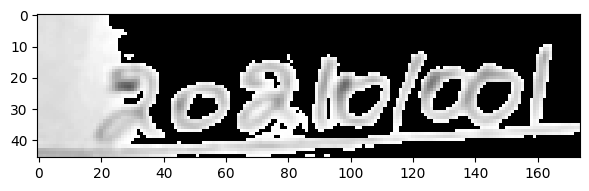

In [76]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\37. Examination Answer Sheet Marks Entrance Using OCR\\Updated\\Attendance Sheet Images"
img = cv2.imread(path+"\\6.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 160, 100, cv2.THRESH_TOZERO_INV)
plt.figure(figsize=(7,7))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [77]:
confg = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_string(img, config=confg)
print(boxes)


20



## Convert to RGB

In [5]:
# pytesseract deals with RGB images so we have to convert to RGB as opencv reads in BGR format
RGBimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newImg = RGBimg.copy()
digitImg = RGBimg.copy()

## Give it to pytesserect 

In [10]:
confg = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_boxes(RGBimg, config=confg)
print(boxes)


0 0 0 182 37 0



In [21]:
imageH, imageW, _ = RGBimg.shape

In [22]:
import cv2 as cv

In [23]:
############## detecting Characters
boxes = pytesseract.image_to_boxes(RGBimg)

# Each character is transform into list and their bounding box information like x, y, w and h is captured
for b in boxes.splitlines():
    b = b.split(" ")
    # print(b)
    # the b[1], 2, 3 and 4 are the x, y, w and h of the each character
    # as it is obtained in the form of string so we need to convert into integers
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    # now draw the rectangle 
    cv.rectangle(RGBimg, (x, imageH-y), (w, imageH-h), (255,0,255), 2)

    # now we have to label thses characters 
    cv.putText(RGBimg, b[0], (x, imageH-y+20), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

############### detecting words
# image_to_data() is the function of pytesseract library which extract the words from image 
boxes = pytesseract.image_to_data(newImg)
print(boxes)

for x, b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        # print(b)
        if len(b) == 12:
            x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            # now draw the rectangle 
            cv.rectangle(newImg, (x, y), (x+w, y+h), (255,0,255), 2)

            # now we have to label thses characters 
            cv.putText(newImg, b[11], (x, y-5), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)

############### detecting digits only
# image_to_data() is the function of pytesseract library which extract the words from image 
# so now we have to define some configurations
confg = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_data(digitImg, config=confg)
print(boxes)

for x, b in enumerate(boxes.splitlines()):
    if x!=0:
        b = b.split()
        # print(b)
        if len(b) == 12:
            x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            # now draw the rectangle 
            cv.rectangle(digitImg, (x, y), (x+w, y+h), (255,0,255), 2)

            # now we have to label thses characters 
            cv.putText(digitImg, b[11], (x, y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)


# Display image
cv.imshow("image", RGBimg)
cv.imshow("new", newImg)
cv.imshow("digit", digitImg)
cv.waitKey()

cv.destroyAllWindows()

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	3120	4160	-1	
2	1	1	0	0	0	1238	540	1882	586	-1	
3	1	1	1	0	0	1238	540	1882	586	-1	
4	1	1	1	1	0	1238	540	1882	185	-1	
5	1	1	1	1	1	1238	540	1882	185	95.000000	    
4	1	1	1	2	0	2492	725	628	123	-1	
5	1	1	1	2	1	2492	725	628	123	95.000000	 
4	1	1	1	3	0	2492	848	628	114	-1	
5	1	1	1	3	1	2492	848	628	114	95.000000	  
4	1	1	1	4	0	2781	962	339	164	-1	
5	1	1	1	4	1	2781	962	339	164	95.000000	 
2	1	2	0	0	0	1030	554	33	25	-1	
3	1	2	1	0	0	1030	554	33	25	-1	
4	1	2	1	1	0	1030	554	33	25	-1	
5	1	2	1	1	1	1030	554	33	25	0.000000	Sar7
2	1	3	0	0	0	837	567	1368	102	-1	
3	1	3	1	0	0	837	567	1368	102	-1	
4	1	3	1	1	0	837	567	1368	102	-1	
5	1	3	1	1	1	837	612	192	1	81.363892	\Hammad
5	1	3	1	1	2	1057	569	181	87	94.529449	Mahmood
5	1	3	1	1	3	1657	567	79	79	51.324383	MA
5	1	3	1	1	4	1768	571	92	98	36.005650	si
5	1	3	1	1	5	1878	588	86	71	45.775726	o8
5	1	3	1	1	6	1976	601	55	63	82.266068	+
5	1	3	1	1	7	2184	630	21	13	69.30382

In [51]:
import cv2

cap = cv2.VideoCapture(0)

while True:

    _, frame = cap.read()
    # frame = cv2.flip(frame, 1)

    cv2.imshow("image", frame)
    
    key = cv2.waitKey(1)

    if key == ord("s"):
        cv2.imwrite("image.jpg", frame)
    elif key == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()